# I. Introduction 

**Identity**

Wirawan Setio Aji <br>
BATCH-14 

**Dataset**

Dataset Ini diperoleh dari [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


This is a  Telco Company Customer dataset those customer who use Telco Phone, Internet service and Online Securities service.

data description :

- `customerID`, id of each customer
- `gender` : whether customer is Male or Female.
- `SeniorCitizen` : is customer age is > 65 years old ? (1:yes,0:no).
- `Prtner` : is customer married ? (yes,no)
- `Dependant` : is costumer financially independent? (yes,no).
- `tenure` : how long customer being a Telco's customer in months
- `PhoneServices` : is customer using phone service.
- `MultipleLines` : is customer has multiple phone line from Telco ? (Yes, No, No phone service)
- `InternetService` : what service customer using for internet service ? (DSL, Fiber optic, No)
- `OnlineSecurity` : is customer using online security service (Yes, No, No internet service)
- `OnlineBackup` : is customer subscribe to online backup service ?(yes,no)
- `DeviceProtection` : is customer subscribe to device protection
- `TechSupport` : is customer subscribe to tech support plan  
- `StreamingTV` : is customer subscribe to TV streaming
- `StreamingMovies` : is customer subscribe to movies streaming
- `PaperlessBilling` : is customer choose to paperless bill ?
- `PaymentMethod` : method that customer use to paid the bills
- `MonthlyCharges` : current monthly customer bill
- `TotalCharges` : total customer bills.
- `Churn` : is customer leaving the Telco Service (yes:leave, no:stay)

**Objective**

make prediction of customer `churn` status using **ANN** deep learning algorithm.

churn status is a status for customer who stop using Telco service, or generally stop being Telco's customer.


# II. Import Libraries

all libraries that use in this project.

In [1]:
import pandas as pd # Data flow
pd.set_option("display.max.columns",None) # display all columns
import numpy as np # algebra linear
%load_ext autoreload

%autoreload 2
# Data Visual
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

 # outliers sencoring
from outliermod import skewness,outliersCheck,outlier_graph,censoring_outliers

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE,SMOTENC
# Modelling 
import tensorflow as tf
from tensorflow import keras

# Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

#saving model
import pickle
import json
import requests

ImportError: cannot import name 'multi_worker_mirrored_2x1_gpu_noshare' from 'tensorflow.python.distribute.strategy_combinations' (c:\Users\ajies\anaconda3\lib\site-packages\tensorflow\python\distribute\strategy_combinations.py)

# III. Data Loading
This is the Data loading section where data will be **load** and **saved in memory as dataframe** 

In [ ]:
df_telco = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=[" "])
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


use **pandas** library to load **.csv** data into **dataframe**

## Dataframe Info 

see the dimension of the dataframe

In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dataframe have **7043 rows** and **21 column**.

and there is **missing values** at `TotalCharge` columns. if we read carefully `TotalCharge` is might a **numeric** data (not a string/object data)



In [ ]:
print("Total Missing value at Total Charge is",df_telco['TotalCharges'].isna().sum())

Total Missing value at Total Charge is 11


`TotalCharge` has 11 missing values

## Check Data Unique Values

evaluate if there is an uncomon **numeric data type** from its unique values, or numeric that has categorical form.

In [ ]:
length = len(df_telco)
list_col = list(df_telco.columns)
list_disc = []
def unique_ratio(df,col,length):
    return len(df[col].unique()) / length

for col in list_col:
    rate = unique_ratio(df_telco,col,length)
    if rate > 0.01:
        list_disc.append(col)
    print("unique ratio " + col +" :",rate)

unique ratio customerID : 1.0
unique ratio gender : 0.0002839698991906858
unique ratio SeniorCitizen : 0.0002839698991906858
unique ratio Partner : 0.0002839698991906858
unique ratio Dependents : 0.0002839698991906858
unique ratio tenure : 0.010364901320460031
unique ratio PhoneService : 0.0002839698991906858
unique ratio MultipleLines : 0.0004259548487860287
unique ratio InternetService : 0.0004259548487860287
unique ratio OnlineSecurity : 0.0004259548487860287
unique ratio OnlineBackup : 0.0004259548487860287
unique ratio DeviceProtection : 0.0004259548487860287
unique ratio TechSupport : 0.0004259548487860287
unique ratio StreamingTV : 0.0004259548487860287
unique ratio StreamingMovies : 0.0004259548487860287
unique ratio Contract : 0.0004259548487860287
unique ratio PaperlessBilling : 0.0002839698991906858
unique ratio PaymentMethod : 0.0005679397983813716
unique ratio MonthlyCharges : 0.22504614510861848
unique ratio TotalCharges : 0.9273037058071845
unique ratio Churn : 0.0002839

**mostly** data are **categorical** with nominal characteristics, except for `'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges' `

In [ ]:
print("Column that have wide unique values : ",list_disc)
for col in list_disc:
    print(df_telco[col].unique())

Column that have wide unique values :  ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


`TotalCharges` could be a **numeric** with **float** datatype

## Change Column Values

in this case convert column of **Total Charge** into float.

In [ ]:
df_telco['TotalCharges'] = df_telco['TotalCharges'].astype(float)

## Change Column Name

in this case **change column name into lower case** of its original columns name, just to make the work less obstacle with typing string mixed upper and lower case inside the columns name.

In [ ]:
# list columns name and convert them into lower case
# put the result into variable new_column
new_columns = [x.lower() for x in df_telco.columns]

# set new column into  dataframes column
df_telco.columns = new_columns

print("new columns :",df_telco.columns)


new columns : Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


# IV. Exploratory Data Analysis (EDA)

EDA conducted to **learn the data** deeper, and extracting **Insight** from it

## Data Balance

see if target data imbalance or not

<AxesSubplot:xlabel='churn', ylabel='count'>

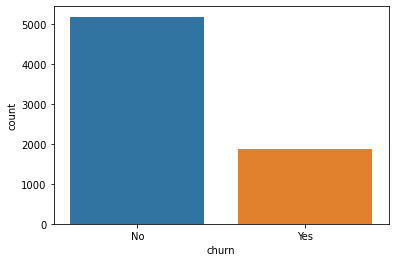

In [ ]:
sns.countplot(data=df_telco,x='churn')

Data seems like has not a balance amount of target, `churn` yes has less amount of data.  

## Heatmap Correlation

look at the numeric data correlation on these columns

`'tenure', 'monthlycharges', 'totalcharges'`


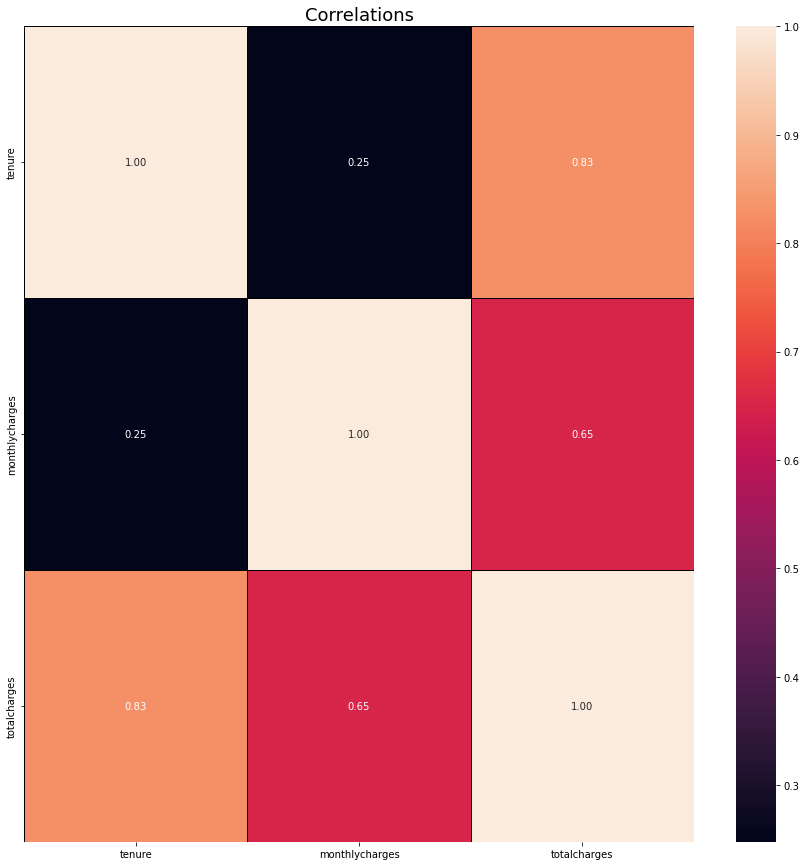

In [ ]:
numeric_col = ['tenure', 'monthlycharges', 'totalcharges']

fig,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_telco[numeric_col].corr(),linecolor = "black",annot=True, 
            linewidths=0.5, fmt = '.2f')
plt.title("Correlations",fontsize = 18)
plt.show()

**monthly charge** does gave the **lowest correlation** to the how long the customer been using the Telco services or **tenure** with, but still 0.25 correlation is a good correlation.

other than that, the columns are having **correlation** **above .65**

## Customer Churn and Customer Tenure

see how **loyal** the customer who **leave** the service and **stay** to use the service

In [ ]:
churn_y = df_telco.query("churn == 'Yes'")
churn_n = df_telco.query("churn == 'No'")

c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-pack

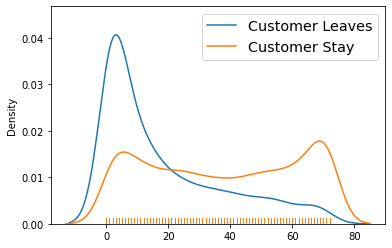

In [ ]:
g = sns.distplot(churn_y[['tenure']],label="Customer Leaves", hist=False, rug=True)
g = sns.distplot(churn_n[['tenure']],label="Customer Stay", hist=False, rug=True)
# plt.setp(g._legend().get_texts(), fontsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

In [ ]:
churn_y.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


**mostly** customer **leaves the service**, after they are subscribed for **10 months**, but still there are **some customer** with around **60 month** subscribed also leaves the service.

and for those who **stay** they had more **equally spread tenure** from the first month until around 70 months

## Customer Churn and Customer Tenure with Seniority Factor

next is to show how the tenure and seniority of the customer related to the churn

c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-pack

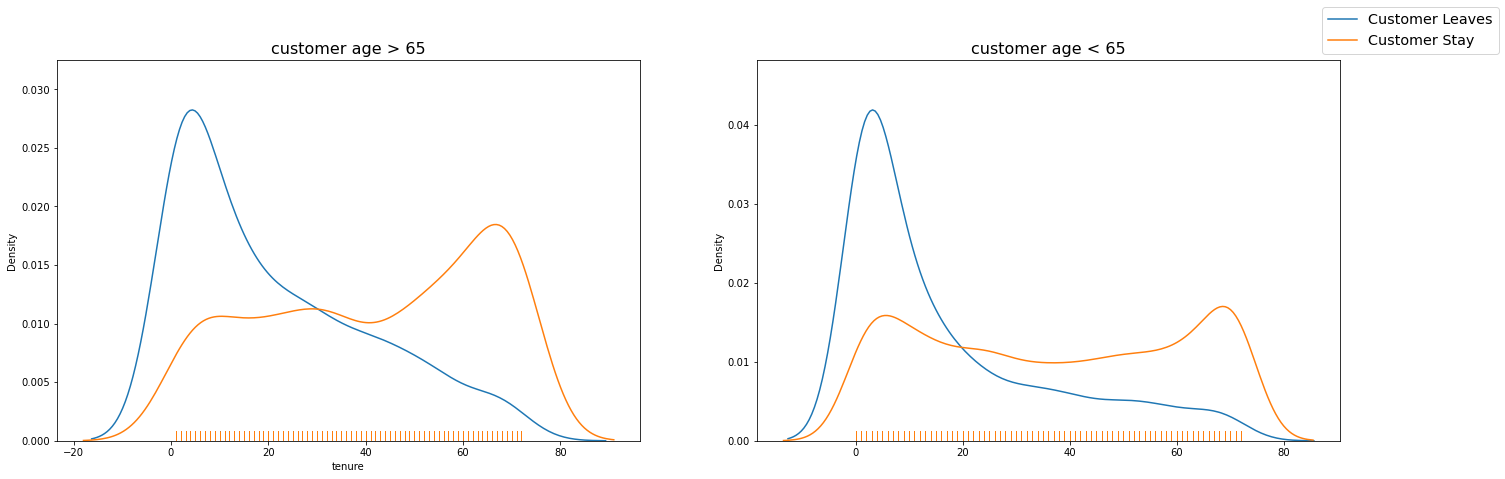

In [ ]:
# customer < 65 years old
churn_y_young = churn_y.query("seniorcitizen == 0")
churn_n_young = churn_n.query("seniorcitizen == 0")
# customer > 65 years old
churn_y_senior = churn_y.query("seniorcitizen == 1")
churn_n_senior = churn_n.query("seniorcitizen == 1")

fig,ax = plt.subplots(ncols=2,figsize=(23,7))
sns.distplot(churn_y_senior['tenure'], hist=False,label="Customer Leaves", rug=True, ax=ax[0])
ax[0].set_title('customer age > 65',fontsize= 16)

sns.distplot(churn_n_senior[['tenure']],label="Customer Stay", hist=False, rug=True,ax=ax[0])


sns.distplot(churn_y_young[['tenure']], hist=False,rug=True,ax=ax[1])
ax[1].set_title('customer age < 65',fontsize= 16)

sns.distplot(churn_n_young[['tenure']], hist=False, rug=True,ax=ax[1])

fig.legend(fontsize='x-large', title_fontsize='40')
# c_y_y = churn_y.query("seniorcitizen == 1")
# c_n_o = churn_n.query("seniorcitizen == 1")
# g = sns.distplot(c_y_y[['tenure']],label="Customer Leaves", hist=False, rug=True)
# g = sns.distplot(c_n_o[['tenure']],label="Customer Stay", hist=False, rug=True)
# plt.setp(g._legend().get_texts(), fontsize=16)



senior customer does has more loyal to use Telco services, as you can see, customer who has age above 65 years old, has better tenure count, indicator the senior customer has been a customer for morethan 5 years

## Customer Churn and Service Bill (Monthly)

how the **services Bill monthly** will impact the customer to stay or leave.

c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ajies\anaconda3\lib\site-pack

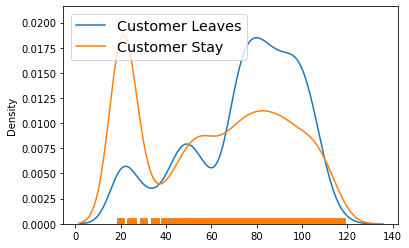

In [ ]:
g = sns.distplot(churn_y[['monthlycharges']],label="Customer Leaves", hist=False, rug=True)
g = sns.distplot(churn_n[['monthlycharges']],label="Customer Stay", hist=False, rug=True)
# plt.setp(g._legend().get_texts(), fontsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

surely there are a **lot of customer** will stay on bill **cost at 20**, and **fall around 40's**, and started to **rise at > 50 and < 85**.

and **customer will leaves** the services when  the **bill cost around 60 until 100**.

## Services

there are **multiple services** at Telco corp, and those services are :  
- phone service
- internet service
- online security
- online backup
- device protection
- tech support
- streaming tv
- streaming movies

we will see the **relationship** between **customers curn** and with the **Telco's services**

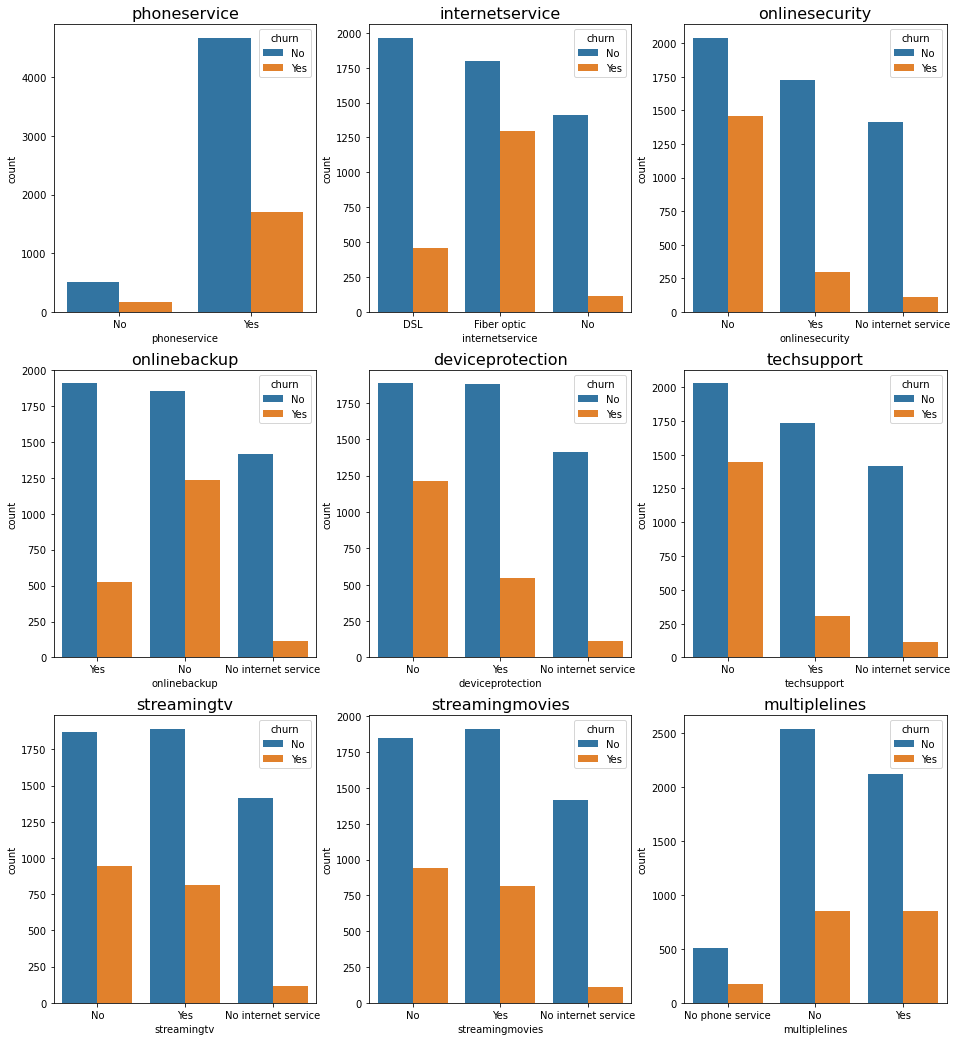

In [ ]:
service_list = ['phoneservice', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies','multiplelines']

n_col = 3
n_row = 3

fig,ax = plt.subplots(nrows=n_row,ncols= n_col,figsize=(16,18))
col_count = 0
row_count = 0
for service in service_list:
       sns.countplot(data=df_telco ,x=service,ax=ax[row_count,col_count],hue='churn')
       ax[row_count,col_count].set_title(service,fontsize= 16)
       
       col_count += 1
       if col_count >= n_col:
              col_count = 0
              row_count += 1

In [ ]:
churn_y.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


most of the people leaves the services as Telco customer are people that only use Internet service **without online security, online backup, device protection, tech support**

but for the **entertainment service** like streaming movies and TV are having same ratio with or without the entertainment service between customer churn, this might indicates almost half of people who leave as customer already tried the entertainment service.

In [ ]:
# selected_cn = churn_n.query("internetservice == 'Fiber optic' | \
#                             deviceprotection == 'No' | \
#                             onlinesecurity == 'No' | \
#                             onlinebackup == 'No' | \
#                             techsupport == 'No'")


# selected_cy = churn_y.query("internetservice == 'Fiber optic' &\
#                             deviceprotection == 'No' & \
#                             onlinesecurity == 'No' & \
#                             onlinebackup == 'No' & \
#                             techsupport == 'No'")
# selected_cy = churn_y.query("internetservice == 'Fiber optic' & contract == 'Month-to-month'")

selected_cy = churn_y.query("streamingmovies == 'No'& streamingtv == 'No' ")
print("Ratio : ",len(selected_cy)/len(churn_y))
print("Ratio total : ",len(churn_y)/len(df_telco))
print("selected count",len(selected_cy))

Ratio :  0.37185660781166396
Ratio total :  0.2653698707936959
selected count 695


## Social Status

see the **relationship** between **Gender, partner, and financial dependency** for customer **curhn status**

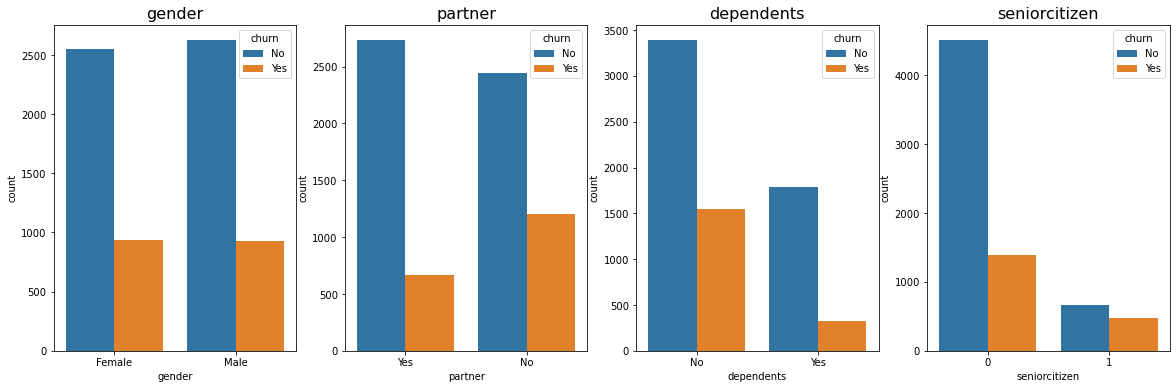

In [ ]:
social_status = ['gender', 'partner',
       'dependents',"seniorcitizen"]

n_col = 4

fig,ax = plt.subplots(ncols= n_col,figsize=(20,6))
col_count = 0
for service in social_status:
       sns.countplot(data=df_telco ,x=service,ax=ax[col_count],hue='churn')
       ax[col_count].set_title(service,fontsize= 16)
       
       col_count += 1

seems like gender is **not effecting directly** for people leaving as a Telco's Customer.

for customer that have **married status** or `partner`, those who is not married have customer churn status ratio slightly more than those who were married. 

and for customer who **financially independent** are less having the service but have **less chance to leave** as a customer.

and for the `senior citizen` or customer who had age > 65 years old. The customer who is not senior yet, are the majority at Telco company. 

## Financial Solution

financial solution is how **customer solve the payment problem**, from the status of `contract`,`payment methods`, and `paperless bill`. those status will be compared to the customer **churn status**

<AxesSubplot:xlabel='paymentmethod', ylabel='count'>

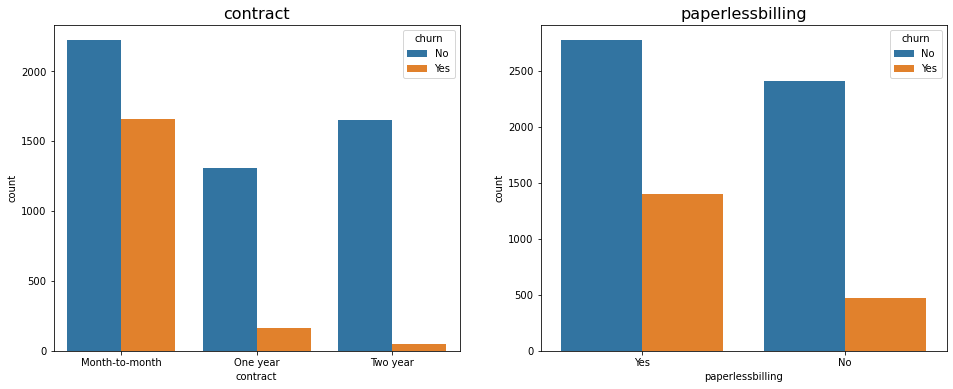

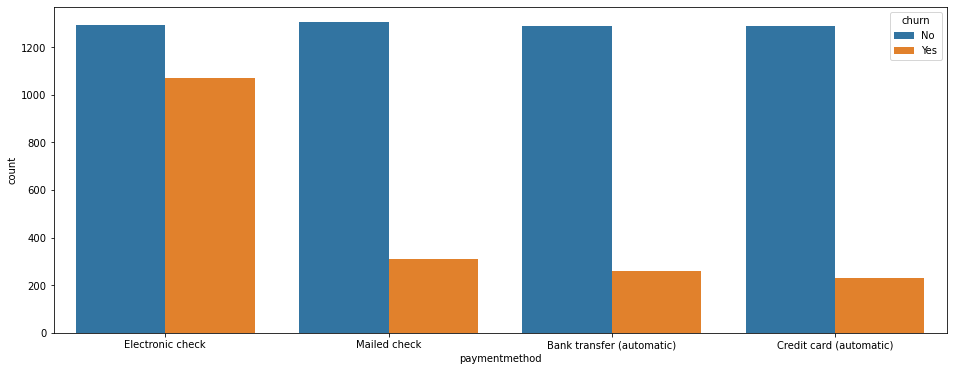

In [ ]:
list_solution = ['contract', 'paperlessbilling']

n_col = 2

fig,ax = plt.subplots(ncols= n_col,figsize=(16,6))
col_count = 0
for service in list_solution:
       sns.countplot(data=df_telco ,x=service,ax=ax[col_count],hue='churn')
       ax[col_count].set_title(service,fontsize= 16)
       
       col_count += 1
       
fig,ax = plt.subplots(figsize=(16,6))    
sns.countplot(data=df_telco ,x='paymentmethod',ax=ax,hue='churn')

customer with **contract payment month to month** and **pay with Electronic Check** have big chance to leave as customer.

customer who had **paperless billing** also have more chance to **leave** as customer.

# V. Data Preprocessing 

give some samples for data inference

and use non-inference data for data training and data test

## Inference Data

**Data Inference**
take 10 samples for inference model

In [ ]:
# take 10 sample of random data
pickup_inf = df_telco.sample(10,random_state=12)

pickup_inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 6235 to 6368
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        10 non-null     object 
 1   gender            10 non-null     object 
 2   seniorcitizen     10 non-null     int64  
 3   partner           10 non-null     object 
 4   dependents        10 non-null     object 
 5   tenure            10 non-null     int64  
 6   phoneservice      10 non-null     object 
 7   multiplelines     10 non-null     object 
 8   internetservice   10 non-null     object 
 9   onlinesecurity    10 non-null     object 
 10  onlinebackup      10 non-null     object 
 11  deviceprotection  10 non-null     object 
 12  techsupport       10 non-null     object 
 13  streamingtv       10 non-null     object 
 14  streamingmovies   10 non-null     object 
 15  contract          10 non-null     object 
 16  paperlessbilling  10 non-null     object 

**Set Non-Inference** 

In [ ]:
# REMOVE INFERENCE SET FROM DATA SET for non inference data
non_inference = df_telco.drop(pickup_inf.index)
non_inference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7033 non-null   object 
 1   gender            7033 non-null   object 
 2   seniorcitizen     7033 non-null   int64  
 3   partner           7033 non-null   object 
 4   dependents        7033 non-null   object 
 5   tenure            7033 non-null   int64  
 6   phoneservice      7033 non-null   object 
 7   multiplelines     7033 non-null   object 
 8   internetservice   7033 non-null   object 
 9   onlinesecurity    7033 non-null   object 
 10  onlinebackup      7033 non-null   object 
 11  deviceprotection  7033 non-null   object 
 12  techsupport       7033 non-null   object 
 13  streamingtv       7033 non-null   object 
 14  streamingmovies   7033 non-null   object 
 15  contract          7033 non-null   object 
 16  paperlessbilling  7033 non-null   object 


reset index, for preventing the error in the future

In [ ]:
# reset index for safety measure
non_inference.reset_index(drop=True,inplace=True)

## Features and Target

split non-inference data into features and target

in this case our target is `churn`, so set features all columns except `churn`

In [ ]:
# set X or Features  and y or Target
X = non_inference.drop('churn',axis=1)
y = non_inference['churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7028     No
7029     No
7030     No
7031    Yes
7032     No
Name: churn, Length: 7033, dtype: object

## Split Train And Test

after selecting feature and target, split them into Train, Test data, and validation for model evaluation

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
print(X_train.shape)
print

(3955, 20)


<function print>

## Feature Selection

from the EDA section before, found that some feature might be dropped, those features are :

- `customerid` because ID doesn't provide information that support for determining the target
- `totalcharges` total charge gave huge multicollinearity for `tenure` and `monthlycharge` from the **Correlation** Heatmap.
- `gender`, it hasn't been related to the churn status based on the EDA section.
- `phone service `, because **almost all** customer has phone service.
- `senior citizen`, same story like phone service, **most customer** **are not a senior citizen**
- `paperless bill`, this feature might be redundant to the payments methods, because **electronic check** probably had paperless bill.


In [ ]:
# list of features that will be dropped
drop_list =['customerid','totalcharges','phoneservice','gender','seniorcitizen','paperlessbilling'] 
X_train = X_train.drop(drop_list,axis=1)
X_valid = X_valid.drop(drop_list,axis=1)
X_test = X_test.drop(drop_list,axis=1)

## Missing Values

Check if the features or the target has missing values

Check Missing values on **feature train** 

In [ ]:
X_train.isna().sum()

partner             0
dependents          0
tenure              0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paymentmethod       0
monthlycharges      0
dtype: int64

feature train have **no missing values**

Check Missing values on **feature train validation** 

In [ ]:
X_valid.isna().sum()

partner             0
dependents          0
tenure              0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paymentmethod       0
monthlycharges      0
dtype: int64

feature validaftion have **no missing values**

Check Missing values on **feature test validation** 

In [ ]:
X_test.isna().sum()

partner             0
dependents          0
tenure              0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paymentmethod       0
monthlycharges      0
dtype: int64

feature test have **no missing values**

Check if **target train ,validation ,and test** have missing values

In [ ]:
print("target train count missing values : ",y_train.isna().sum())
print("target validation count missing values : ",y_valid.isna().sum())
print("target test count missing values : ",y_test.isna().sum())

target train count missing values :  0
target validation count missing values :  0
target test count missing values :  0


all target have no missing values

## Split Numeric And Categorical

In [ ]:
# identify numeric - categoric columns from the features
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("numeric features :", num_columns)
print("categorical features :", cat_columns)

numeric features : ['tenure', 'monthlycharges']
categorical features : ['partner', 'dependents', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paymentmethod']


split all numeric and categoric from feature train ,test and validation

In [ ]:
x_train_num = X_train[num_columns]
x_train_cat = X_train[cat_columns]

x_test_num = X_test[num_columns]
x_test_cat = X_test[cat_columns]

x_val_num = X_valid[num_columns]
x_val_cat = X_valid[cat_columns]

## Outliers

Handling outliers applied only for **X train adn X validation numeric**  feature, for this case I choose Censorring or Capping method to handling the outliers. **if there are outliers detected**

check if there are outliers on numeric feature Train 

In [ ]:
col_skews = skewness(x_train_num)
outliers = outliersCheck(x_train_num,col_skews)

feature name :  tenure
outliers percentage : 0.0%
distribution normal
upper : 82.16346440402779 lower : -16.431479574697832
****************************************************
feature name :  monthlycharges
outliers percentage : 0.0%
distribution normal
upper : 124.85058285506291 lower : 4.5616042498673295
****************************************************


numeric feature train have no outliers

check if there are outliers on numeric feature validation

In [ ]:
col_skews = skewness(x_val_num)
outliers = outliersCheck(x_val_num,col_skews)

feature name :  tenure
outliers percentage : 0.0%
distribution normal
upper : 80.28303306790787 lower : -17.309568321888143
****************************************************
feature name :  monthlycharges
outliers percentage : 0.0%
distribution normal
upper : 125.48126297434217 lower : 4.8646809225494465
****************************************************


numeric feature validation have no outliers

both train and validation have no outliers, so **handling outliers is not necessary**

## Unbalance data Handling

From the EDA section, the target has been found as **un-balanced target** quantity, between yes and no

in this case **SMOTENC** resampling is performed to handle multiple category data.

In [ ]:
smotenc = SMOTENC([0,1,3,4,5,6,7,8,9,10,11,12], random_state = 42)
X_train, y_train = smotenc.fit_resample(X_train, y_train)
X_valid, y_valid = smotenc.fit_resample(X_valid, y_valid)
y_train.value_counts()

# smotess = SMOTE(k_neighbors=5, random_state=42)
# X_train_balanced, y_train_balanced = smotess.fit_resample(x_train_trans, y_train_final)
# X_val_balanced, y_train_balanced = smotess.fit_resample(x_train_trans, y_train_final)

Yes    2926
No     2926
Name: churn, dtype: int64

In [ ]:
y_train 

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
5847    Yes
5848    Yes
5849    Yes
5850    Yes
5851    Yes
Name: churn, Length: 5852, dtype: object

## Feature Scalling
scale all numeric data

features will be scalled with **standard scaling**.

In [ ]:
#  define scaler using standard scaler

num_pipeline = make_pipeline(StandardScaler())

## Feature Encoding 

feature that categorical are very important to be encoded therefore model to be able to process the data.

use one **hot encoder** to encode categorical data, because all of them are **nominal** data

In [ ]:
# define pipeline onehot encoder 

cat_pipeline = make_pipeline(OneHotEncoder())


## Convert target into Integer Categoric

ANN can't handle string categorical target, so we convert it with integer

In [ ]:
y_train_final = pd.DataFrame(pd.Categorical(y_train).codes)[0]
y_test_final = pd.DataFrame(pd.Categorical(y_test).codes)[0]
y_valid_final = pd.DataFrame(pd.Categorical(y_valid).codes)[0]

y_train_final = np.asarray(y_train_final).astype('float32').reshape((-1,1))
y_test_final = np.asarray(y_test_final).astype('float32').reshape((-1,1))
y_valid_final = np.asarray(y_valid_final).astype('float32').reshape((-1,1))

## Merge Data Numeric and Categoric

after data numerical and categorical were scaled and encoded, merge them based on train, test, or validation features

In [ ]:
# # use numpy concenate
# x_train_final = np.concatenate([x_train_scaled,x_train_encoded],axis=1)
# x_test_final = np.concatenate([x_test_scaled,x_test_encoded],axis=1)
# x_val_final = np.concatenate([x_val_scaled,x_val_encoded],axis=1)
# gabungkan hasil pipeline menjadi fitur
data_pipeline = ColumnTransformer([
    ('pipeline_numeric', num_pipeline, num_columns),
    ('pipeline_categoric', cat_pipeline, cat_columns)
])

x_train_trans = data_pipeline.fit_transform(X_train)
x_test_trans = data_pipeline.transform(X_test)
x_val_trans = data_pipeline.transform(X_valid)

## Tensorflow Pipeline

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # auto tune prefetch
batch_size = 140

# data_batches = tf.data.Dataset.from_tensor_slices((x_train_trans, y_train_final)).shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)


train_final = tf.data.Dataset.from_tensor_slices((x_train_trans, y_train_final)).batch(batch_size).cache().prefetch(AUTOTUNE)
test_final = tf.data.Dataset.from_tensor_slices((x_test_trans, y_test_final)).batch(batch_size).cache().prefetch(AUTOTUNE)
val_final = tf.data.Dataset.from_tensor_slices((x_val_trans, y_valid_final)).batch(batch_size).cache().prefetch(AUTOTUNE)


In [ ]:
x_test_trans.shape

(1759, 37)

In [ ]:
test_final

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 37), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

# VI. Model Definition 

in this model definition we use **ANN Deep learning algorithm** make 2 type of model solving, 
1. Sequential API
2. Functional API

In [ ]:
# define random seed
keras.backend.clear_session()
np.random.seed(12)
tf.random.set_seed(12)

## Sequential API

ANN model using sequence API

### **Base Model**

base model for a simple basic model of sequence api of ANN

In [ ]:
# Model definition
model_sq = keras.models.Sequential()
model_sq.add(keras.layers.Dense(32,input_shape=(37,),name="Input"))   
model_sq.add(keras.layers.Dense(16, activation="relu",name="hidden_1"))
model_sq.add(keras.layers.Dense(1,activation="sigmoid",name="output"))

# base Model compile
model_sq.compile(loss="binary_crossentropy",
              optimizer= keras.optimizers.Adam(learning_rate=0.0015),
              metrics=[keras.metrics.Recall()])

# callback for stopping early epochs with restore_best_weights
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#### Model Summary

base model summary

In [ ]:
model_sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 32)                1216      
                                                                 
 hidden_1 (Dense)            (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


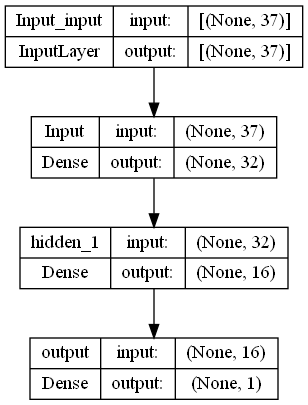

In [ ]:
keras.utils.plot_model(model_sq, "my_fashion_mnist_model.png", show_shapes=True)

### **Improved Model**

Experiment for sequential API 
Experiment model consist with 
- more **Neuron** 
- 3 hidden layer 
- and **dropout**
- regularization
- adamax optimizer

In [ ]:
# define model 


model_sq_imp = keras.models.Sequential()

model_sq_imp.add(keras.layers.Dense(240,input_shape=(37,),kernel_initializer=keras.initializers.he_normal(seed=12),name="Input"))  

model_sq_imp.add(tf.keras.layers.Dense(120,kernel_regularizer=tf.keras.regularizers.l2(),kernel_initializer=keras.initializers.he_normal(seed=12),name="hidden_1"))
model_sq_imp.add(tf.keras.layers.Activation('relu'))
# model_sq_imp.add(tf.keras.layers.BatchNormalization())
model_sq_imp.add(tf.keras.layers.Dropout(rate=0.1))

model_sq_imp.add(tf.keras.layers.Dense(60,kernel_regularizer=tf.keras.regularizers.l2(),kernel_initializer=keras.initializers.he_normal(seed=12),name="hidden_2"))
model_sq_imp.add(tf.keras.layers.Activation('relu'))
# model_sq_imp.add(tf.keras.layers.BatchNormalization())
model_sq_imp.add(tf.keras.layers.Dropout(rate=0.1))

model_sq_imp.add(tf.keras.layers.Dense(30,kernel_regularizer=tf.keras.regularizers.l2(),kernel_initializer=keras.initializers.he_normal(seed=12),name="hidden_3"))
model_sq_imp.add(tf.keras.layers.Activation('relu'))
# model_sq_imp.add(tf.keras.layers.BatchNormalization())
model_sq_imp.add(tf.keras.layers.Dropout(rate=0.1))

model_sq_imp.add(keras.layers.Dense(1,activation="sigmoid",name="output"))

# Improved Model compile
model_sq_imp.compile(loss="binary_crossentropy",
              optimizer= keras.optimizers.Adamax(),
              metrics=[keras.metrics.Recall()])



#### Model Summary
Experiment sequence model Summary

In [ ]:
model_sq_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 240)               9120      
                                                                 
 hidden_1 (Dense)            (None, 120)               28920     
                                                                 
 activation (Activation)     (None, 120)               0         
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 hidden_2 (Dense)            (None, 60)                7260      
                                                                 
 activation_1 (Activation)   (None, 60)                0         
                                                                 
 dropout_1 (Dropout)         (None, 60)               

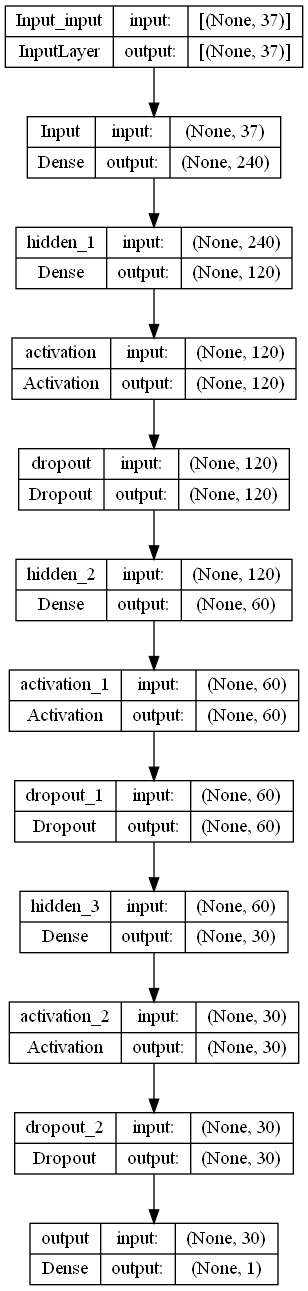

In [ ]:
keras.utils.plot_model(model_sq_imp, "my_fashion_mnist_model.png", show_shapes=True)

## Functional API

ANN Model wit functional API

### Base Model

Simple ANN Model

In [ ]:
# define model functional
input_ = keras.layers.Input(shape=(37,),name="Input")
hidden2 = keras.layers.Dense(16, activation="sigmoid",name='hidden_2')(input_)
output = keras.layers.Dense(1, activation="sigmoid",name="output")(hidden2)
model_func = keras.models.Model(inputs=[input_], outputs=[output])
# Complie Model
model_func.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.005),
              metrics=[keras.metrics.Recall()])


#### Model Summary

In [ ]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 37)]              0         
                                                                 
 hidden_2 (Dense)            (None, 16)                608       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


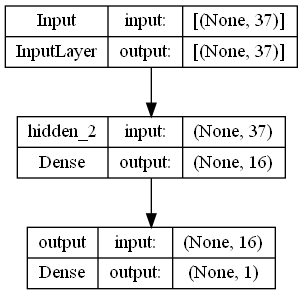

In [ ]:
keras.utils.plot_model(model_func, "my_fashion_mnist_model.png", show_shapes=True)

### Improvement Model

Experiment with ANN Model Functional API
Improved model consist with 
- more **Neuron** 
- 1 Concate with 3 hidden layers
- kernel initializer
- reguarization
- SGD optimizer with learning rate 0.001

In [ ]:
# define model functional
input_ = keras.layers.Input(shape=(37,),name="Input")
hidden1 = keras.layers.Dense(90,kernel_regularizer=tf.keras.regularizers.l2(), kernel_initializer=keras.initializers.he_normal(seed=12),activation="relu",name='hidden_1')(input_)
hidden2 = keras.layers.Dense(30,kernel_regularizer=tf.keras.regularizers.l2(), kernel_initializer=keras.initializers.he_normal(seed=12),activation="relu",name='hidden_2')(hidden1)
hidden3 = keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2(), kernel_initializer=keras.initializers.he_normal(seed=12),activation="relu",name='hidden_3')(hidden2)
concat_0 = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid",name="output")(concat_0)
model_func_imp = keras.models.Model(inputs=[input_], outputs=[output])
# Complie Model loss binary_crossentropy and recall
model_func_imp.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=[keras.metrics.Recall()])

#### Model Summary



model summary for experimental ANN Functional API

In [ ]:
model_func_imp.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 37)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 90)           3420        ['Input[0][0]']                  
                                                                                                  
 hidden_2 (Dense)               (None, 30)           2730        ['hidden_1[0][0]']               
                                                                                                  
 hidden_3 (Dense)               (None, 10)           310         ['hidden_2[0][0]']               
                                                                                            

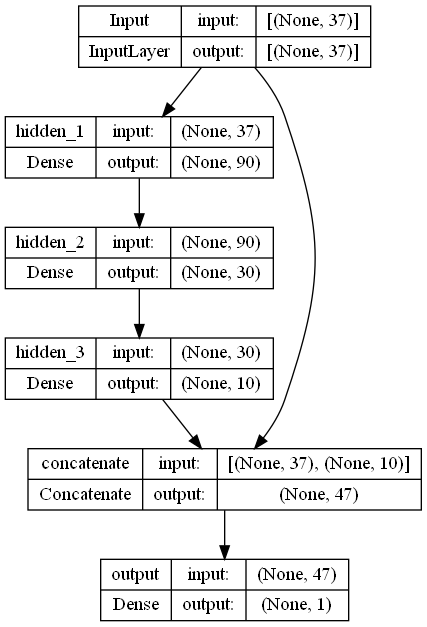

In [ ]:
keras.utils.plot_model(model_func_imp, "my_fashion_mnist_model.png", show_shapes=True)

# VII. Model Training

For evaluating the result, here using the **Recall** metrics

## Sequential API

Train and Evaluate model on Sequentiial Model

**Base Model**

Train with **104 epochs** and **early stopping callback**

In [ ]:
history_sq = model_sq.fit(train_final, epochs=104,
                    validation_data=val_final,
                    callbacks=[early_stopping_cb])

Epoch 1/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4632 - recall: 0.7973 - val_loss: 0.4616 - val_recall: 0.8534
Epoch 2/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4662 - recall: 0.8052 - val_loss: 0.4664 - val_recall: 0.8586
Epoch 3/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4689 - recall: 0.8072 - val_loss: 0.4616 - val_recall: 0.8607
Epoch 4/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4659 - recall: 0.8113 - val_loss: 0.4615 - val_recall: 0.8513
Epoch 5/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4607 - recall: 0.8117 - val_loss: 0.4593 - val_recall: 0.8503
Epoch 6/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4558 - recall: 0.8100 - val_loss: 0.4612 - val_recall: 0.8429
Epoch 7/104
42/42 [==============================] - 0s 3ms/step - loss: 0.4553 - recall: 0.8090 - val_loss: 0.4606 - val_recall: 0.8429
Epoch 8/104
42/42 [======================

**Improvement Model**

In [ ]:
history_sq_imp = model_sq_imp.fit(train_final, epochs=104,
                    validation_data=val_final,class_weight = { 0.0 : 0.8 , 1.0 : 1.2 },
                    callbacks=[early_stopping_cb]) #class_weight = { 0.0 : 0.7 , 1.0 : 1.4 }

Epoch 1/104
42/42 [==============================] - 0s 5ms/step - loss: 0.5265 - recall_4: 0.9077 - val_loss: 0.5181 - val_recall_4: 0.9246
Epoch 2/104
42/42 [==============================] - 0s 5ms/step - loss: 0.4853 - recall_4: 0.9125 - val_loss: 0.5141 - val_recall_4: 0.9236
Epoch 3/104
42/42 [==============================] - 0s 5ms/step - loss: 0.4823 - recall_4: 0.9053 - val_loss: 0.5124 - val_recall_4: 0.9204
Epoch 4/104
42/42 [==============================] - 0s 5ms/step - loss: 0.4822 - recall_4: 0.9094 - val_loss: 0.5133 - val_recall_4: 0.9194
Epoch 5/104
42/42 [==============================] - 0s 5ms/step - loss: 0.4829 - recall_4: 0.8982 - val_loss: 0.5118 - val_recall_4: 0.9079
Epoch 6/104
42/42 [==============================] - 0s 5ms/step - loss: 0.4809 - recall_4: 0.8896 - val_loss: 0.5120 - val_recall_4: 0.9089
Epoch 7/104
42/42 [==============================] - 0s 5ms/step - loss: 0.4804 - recall_4: 0.8958 - val_loss: 0.5110 - val_recall_4: 0.9068
Epoch 8/104
4

### Compare Result

Text(0.5, 1.0, 'Improved Model Sequential')

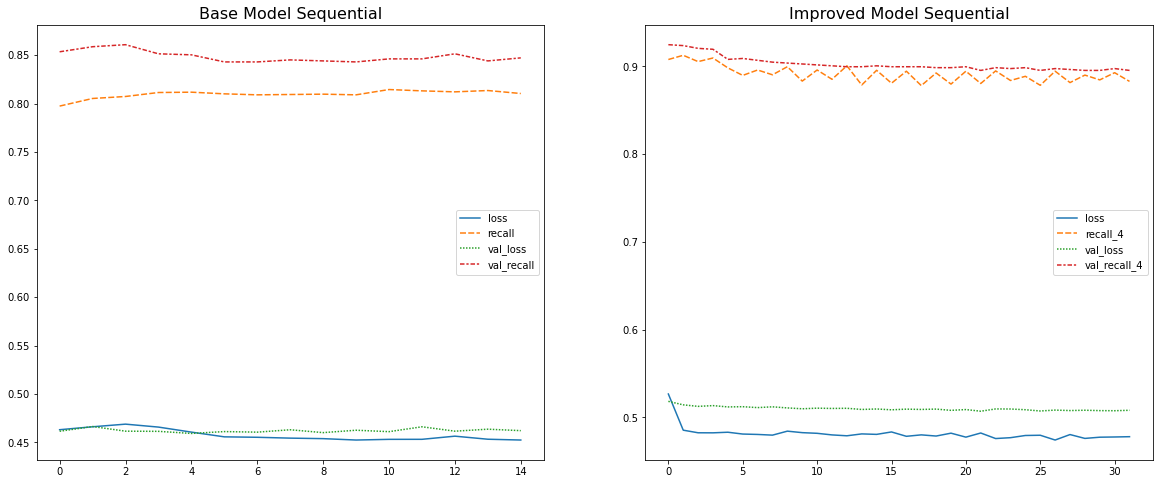

In [ ]:
fig,ax = plt.subplots(ncols= 2,figsize=(20,8))

sns.lineplot(data=pd.DataFrame(history_sq.history),ax=ax[0])
ax[0].set_title("Base Model Sequential",fontsize= 16)

sns.lineplot(data=pd.DataFrame(history_sq_imp.history),ax=ax[1])
ax[1].set_title("Improved Model Sequential",fontsize= 16)

compare the train and validation **loss and recall score**
model sequential improved has **slow step to reduce loss** but has **consistency on Recall score**

## Functional API

train and evaluate model on Functional API

**Base Model**

In [ ]:

history_fn = model_func.fit(train_final, epochs=104,
                    validation_data=val_final,
                    callbacks=[early_stopping_cb])

Epoch 1/104
42/42 [==============================] - 1s 9ms/step - loss: 0.7260 - recall_2: 0.0889 - val_loss: 0.7148 - val_recall_2: 0.2325
Epoch 2/104
42/42 [==============================] - 0s 2ms/step - loss: 0.7160 - recall_2: 0.1596 - val_loss: 0.7065 - val_recall_2: 0.3319
Epoch 3/104
42/42 [==============================] - 0s 2ms/step - loss: 0.7084 - recall_2: 0.2437 - val_loss: 0.7000 - val_recall_2: 0.4000
Epoch 4/104
42/42 [==============================] - 0s 3ms/step - loss: 0.7022 - recall_2: 0.3250 - val_loss: 0.6946 - val_recall_2: 0.5780
Epoch 5/104
42/42 [==============================] - 0s 2ms/step - loss: 0.6968 - recall_2: 0.4016 - val_loss: 0.6896 - val_recall_2: 0.6230
Epoch 6/104
42/42 [==============================] - 0s 2ms/step - loss: 0.6918 - recall_2: 0.4610 - val_loss: 0.6850 - val_recall_2: 0.6471
Epoch 7/104
42/42 [==============================] - 0s 2ms/step - loss: 0.6870 - recall_2: 0.5062 - val_loss: 0.6806 - val_recall_2: 0.6796
Epoch 8/104
4

**Improvement Model**

In [ ]:
history_fn_imp = model_func_imp.fit(train_final, epochs=104,
                    validation_data=val_final,
                    callbacks=[early_stopping_cb])

Epoch 1/104
42/42 [==============================] - 2s 10ms/step - loss: 3.4398 - recall_3: 0.1340 - val_loss: 3.4168 - val_recall_3: 0.1686
Epoch 2/104
42/42 [==============================] - 0s 3ms/step - loss: 3.4069 - recall_3: 0.2109 - val_loss: 3.3875 - val_recall_3: 0.2754
Epoch 3/104
42/42 [==============================] - 0s 3ms/step - loss: 3.3795 - recall_3: 0.2676 - val_loss: 3.3628 - val_recall_3: 0.3403
Epoch 4/104
42/42 [==============================] - 0s 3ms/step - loss: 3.3559 - recall_3: 0.3154 - val_loss: 3.3414 - val_recall_3: 0.4419
Epoch 5/104
42/42 [==============================] - 0s 3ms/step - loss: 3.3352 - recall_3: 0.4033 - val_loss: 3.3227 - val_recall_3: 0.5602
Epoch 6/104
42/42 [==============================] - 0s 3ms/step - loss: 3.3169 - recall_3: 0.4850 - val_loss: 3.3060 - val_recall_3: 0.6031
Epoch 7/104
42/42 [==============================] - 0s 3ms/step - loss: 3.3003 - recall_3: 0.5393 - val_loss: 3.2907 - val_recall_3: 0.6283
Epoch 8/104


Text(0.5, 1.0, 'Improved Model')

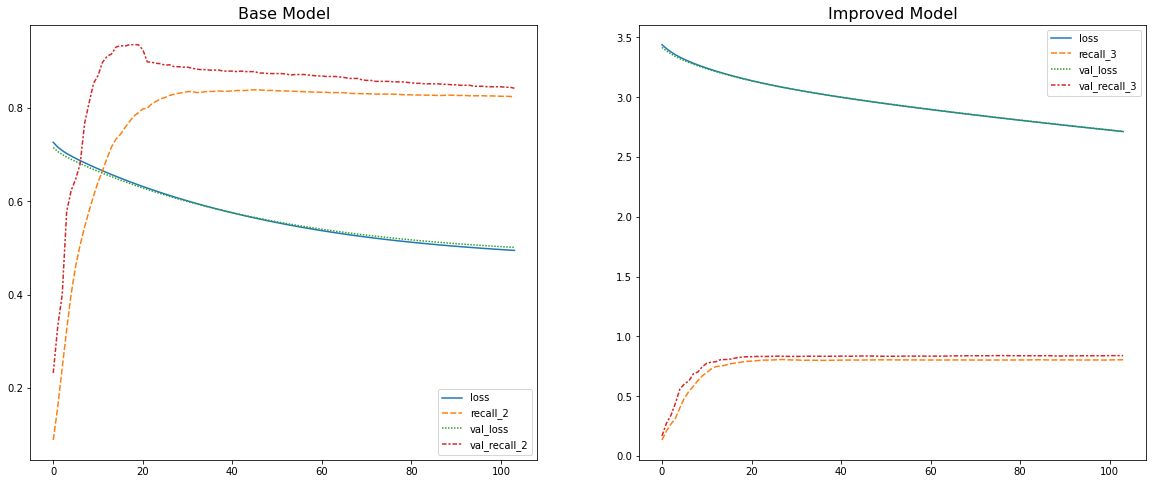

In [ ]:
fig,ax = plt.subplots(ncols= 2,figsize=(20,8))

sns.lineplot(data=pd.DataFrame(history_fn.history),ax=ax[0])
ax[0].set_title("Base Model",fontsize= 16)

sns.lineplot(data=pd.DataFrame(history_fn_imp.history),ax=ax[1])
ax[1].set_title("Improved Model",fontsize= 16)

**Improved model with functional API**  has difficulty to reduce loss score, because the step is very slow to reduce loss score.

but for **base model** has better performance to reduce loss rather than the improved one.

# VIII. Model Evaluation

Evaluation will use **Recall on Customer not Churn**. because of customer that will churn on Telco companies will treat differently, like giving more promotion on telco entertainment service
false negative on Customer not Churn will gave promotion to wrong customer.

## Choose Best from the result

- evaluate recall and loss for base sequential api model

In [ ]:
model_sq.evaluate(test_final) 

13/13 [==============================] - 0s 2ms/step - loss: 0.4947 - recall: 0.8245


[0.49473515152931213, 0.8245242834091187]

- evaluate recall and loss for improvement sequential api model

In [ ]:
model_sq_imp.evaluate(test_final) 

13/13 [==============================] - 0s 2ms/step - loss: 0.5817 - recall_4: 0.9006


[0.5816934108734131, 0.900634229183197]

- evaluate recall and loss on base functional api model

In [ ]:
model_func.evaluate(test_final)

13/13 [==============================] - 0s 2ms/step - loss: 0.5247 - recall_2: 0.8309


[0.5247477889060974, 0.830866813659668]

- evaluate recall and loss on Improvement functional api model

In [ ]:
model_func_imp.evaluate(test_final) 

13/13 [==============================] - 0s 2ms/step - loss: 2.7530 - recall_3: 0.8118


[2.752950668334961, 0.8118393421173096]

**model sequence experiment** or `model_sq_imp` has best result with Recall score and and good amount of loss error (at this moment before it got rerun and ANN decide to change the result)

## Confusion Matrix And Report

Do a prediction from the best model with test data before display confusion matrix

In [ ]:
y_pred_proba = model_sq_imp.predict(x_test_trans)

55/55 [==============================] - 0s 2ms/step


use **treshold** **above .73** to classified as 1 or **customer churn**

In [ ]:
y_pred_result = np.where(y_pred_proba > 0.8, 1, 0)

### confusion matrix

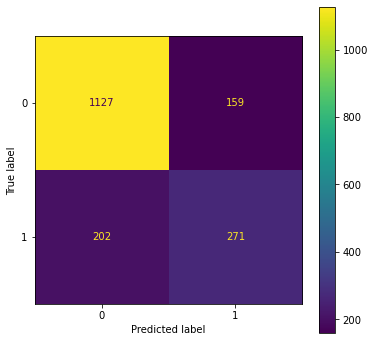

In [ ]:
cm = confusion_matrix(y_test_final,y_pred_result, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test_final,y_pred_result))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1286
         1.0       0.63      0.57      0.60       473

    accuracy                           0.79      1759
   macro avg       0.74      0.72      0.73      1759
weighted avg       0.79      0.79      0.79      1759



Thanks to the **right amount of treshold**, on probability. the result is quite **good with Recall and accuracy**

# IX. Model Save

save the **Data Preprocessor** Pipeline

In [ ]:
with open("preprocess_data.pkl", "wb") as preprocess_pipe:
  pickle.dump(data_pipeline, preprocess_pipe)

Save Model

In [ ]:
model_sq_imp.save("telco_churn_model")

INFO:tensorflow:Assets written to: telco_churn_model\assets


INFO:tensorflow:Assets written to: telco_churn_model\assets


# X Model Inference

reset index inference

In [ ]:
pickup_inf.reset_index(drop=True,inplace=True)

selected features

In [ ]:
inf_select=drop_list
inf_select.append('churn')

In [ ]:
pickup_inf_selected = pickup_inf.drop(drop_list,axis=1)

Scale data Inference using preprocessor pipeline 

In [ ]:
inf_trans = data_pipeline.transform(pickup_inf_selected)

In [ ]:
inf_proba = model_sq_imp.predict(inf_trans)

1/1 [==============================] - 0s 20ms/step


predict with treshold above 0.73

In [ ]:
inf_pred = np.where(inf_proba > 0.73, "Yes", "No")

In [ ]:
inf_pred_df = pd.DataFrame(inf_pred,columns=['prediction_churn'])

Compare Dataframe

In [ ]:
inf_pred_df

,prediction_churn
0,No
1,Yes
2,No
3,Yes
4,No
5,No
6,No
7,No
8,No
9,Yes


In [ ]:
def convert (y):
    if y == 1:
        return "Yes"
    else:
        return 'No'

final_df = pd.concat([pickup_inf,inf_pred_df],axis=1)

In [ ]:
final_df['prediction_churn'] = final_df['prediction_churn'].apply(convert)

In [ ]:
final_df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,prediction_churn
0,5180-UCIIQ,Male,1,Yes,Yes,22,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Mailed check,40.05,880.20,Yes,No
1,8868-WOZGU,Male,0,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.50,Yes,No
2,5012-YSPJJ,Male,0,Yes,Yes,31,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,54.35,1647.00,No,No
3,7225-CBZPL,Male,1,Yes,No,17,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.80,1563.90,No,No
4,0334-ZFJSR,Female,0,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.05,3462.10,No,No
5,2585-KTFRE,Male,0,No,Yes,1,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),70.45,70.45,No,No
6,8148-NLEGT,Female,0,Yes,Yes,42,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,22.95,1014.25,No,No
7,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No,No
8,3429-IFLEM,Female,0,No,No,71,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),77.35,5550.10,No,No
9,2720-WGKHP,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,181.70,Yes,No


## Live server Inference

test out the live server backend at http://milestone-telco-churn-backend.herokuapp.com/

In [ ]:
# new sample data with dataframe format
new_data = {'partner': 'Yes',
         'dependents': 'No',
         'tenure' : 6,
         'multiplelines' :"Yes",
         'internetservice' : "Fiber optic",
         'onlinesecurity' : "No",
         'onlinebackup': "No",
         'deviceprotection': 'Yes',
         'techsupport' : "No",
         'streamingtv' :"Yes",
         'streamingmovies' : "No",
         'contract' : "Month-to-month",
         'paymentmethod' : "Electronic check",
         'monthlycharges' : 105.70
         }
new_data = pd.DataFrame([new_data])
new_data_trans = data_pipeline.transform(new_data)
new_data_list = new_data_trans.tolist()

In [4]:
new_data_list

NameError: name 'new_data_list' is not defined

In [ ]:
# setup send data to server
input_data_json = json.dumps({
    "signature_name": "serving_default",
    "instances": new_data_list
})

In [ ]:
# send request to server
URL = "http://milestone-telco-churn-backend.herokuapp.com/v1/models/telco_churn_model:predict"
r = requests.post(URL, data=input_data_json)
res = r.json()
# convert answer
final_res = ("Yes" if res['predictions'][0][0] else "No")
final_res

'Yes'

the result is success and it is **Yes it is a customer Churn**

# XI Conclusion

In this project that has an objective to make a **prediction** of customer churn status, or customer that stop using the Telco' servis product using ANN Deep Learning.

From the data itself there are some factor that will impact why customer stop using the service. for example **price per-month** that became more expensive. And also most of customer who stop using the service are those **only using Fiber Optic line Internet Service** and some of them also liked to subscribe the entertainment service like streaming TV and Movies service. And also from the social status of the customer, gender seems having the same count whether itis a male or female.

Before we talk about the modeling ,I have to gave an additional information that this data is **un-balance**, from the ratio of customer status `churn` or **the target**. that is why I use **SMOTENC** to bring back the balance of the data, because it it **an resampling algorithm** and sacraficing or removing the current data.

After **Experiment and Train the several model** using **I choose only one** tobe the final model that will **performing the prediction for data inference**. that one model that has the lowest loss score and **best recall score**. but why using Recall score. it is because that predicted customer  that is churn will be treated more special on the one who wanted to churn the service and hopefully they will stay.

from the model evaluation, having above 85 recall on the **customer nt churn** is a good indicator that the model if performed well, and could be improved in the future.

Overall the modelling ANN is suffering on consistency on every run, because each run give different result. but for now Sequential is best for simplicity to experiment on improving model than functional api.